In [1]:
# importing useful stuffzzz
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# importing data
data = pd.read_csv('../Pipelines/MinMax1_Final.csv', index_col=0, header=0)
data.head()

,X1,X2,X12,X13,X14,X15,X16,X17,X18,X19,...,X3_Bin,X4_Bin,X5_Bin,X6,X7,X8,X9,X10,X11,Y
1,0.215686,1.0,0.466150,0.682122,0.675858,0.701892,0.706026,0.697028,0.000000,0.446302,...,2,1,1,2,2,-1,-1,0,0,1
2,0.156863,1.0,0.630650,0.719191,0.712060,0.737827,0.745501,0.741466,0.516562,0.510888,...,2,2,1,-1,2,0,0,0,2,1
3,0.078431,1.0,0.705246,0.806112,0.810737,0.778772,0.788583,0.786343,0.566293,0.564080,...,2,2,2,0,0,0,0,0,0,0
4,0.078431,0.0,0.512625,0.694443,0.776490,0.757732,0.758926,0.753463,0.566293,0.763165,...,2,1,2,0,0,0,0,0,0,0
5,0.078431,0.0,0.765626,0.825749,0.830536,0.753170,0.760409,0.756395,0.610021,0.544403,...,2,1,3,-1,0,-1,0,0,0,0


In [2]:
# Separating the variables using the iloc function
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [3]:
# Converting the data set into a matrix
data_matrix = xgb.DMatrix(data=X,label=y)

In [4]:
# Splitting the data using the same parameters used in the LogisticRegression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [5]:
# Starting the XGBoost
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

## Fitting the xg_reg variable
xg_reg.fit(X_train, y_train)

### Creating the predictions variable
predictors = xg_reg.predict(X_test)

In [6]:
# Creating the rmse model/variable
rmse = np.sqrt(mean_squared_error(y_test,predictors))
print("RMSE : %f" % (rmse))

RMSE : 0.366572


### Cross Validation with XGBoost ###

In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

[19:00:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[19:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_d

In [9]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.482881,0.000264,0.482942,0.000120
1,0.468246,0.002898,0.468317,0.002930
2,0.453138,0.002449,0.453344,0.002729
3,0.440806,0.003342,0.441027,0.003727
4,0.430939,0.003973,0.431291,0.004999


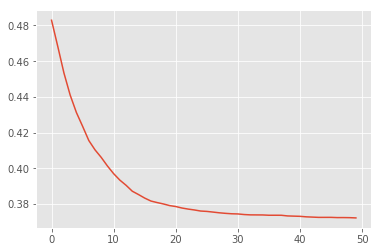

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

In [11]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.37225
Name: test-rmse-mean, dtype: float64


[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[19:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_d

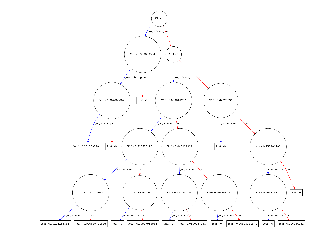

In [12]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

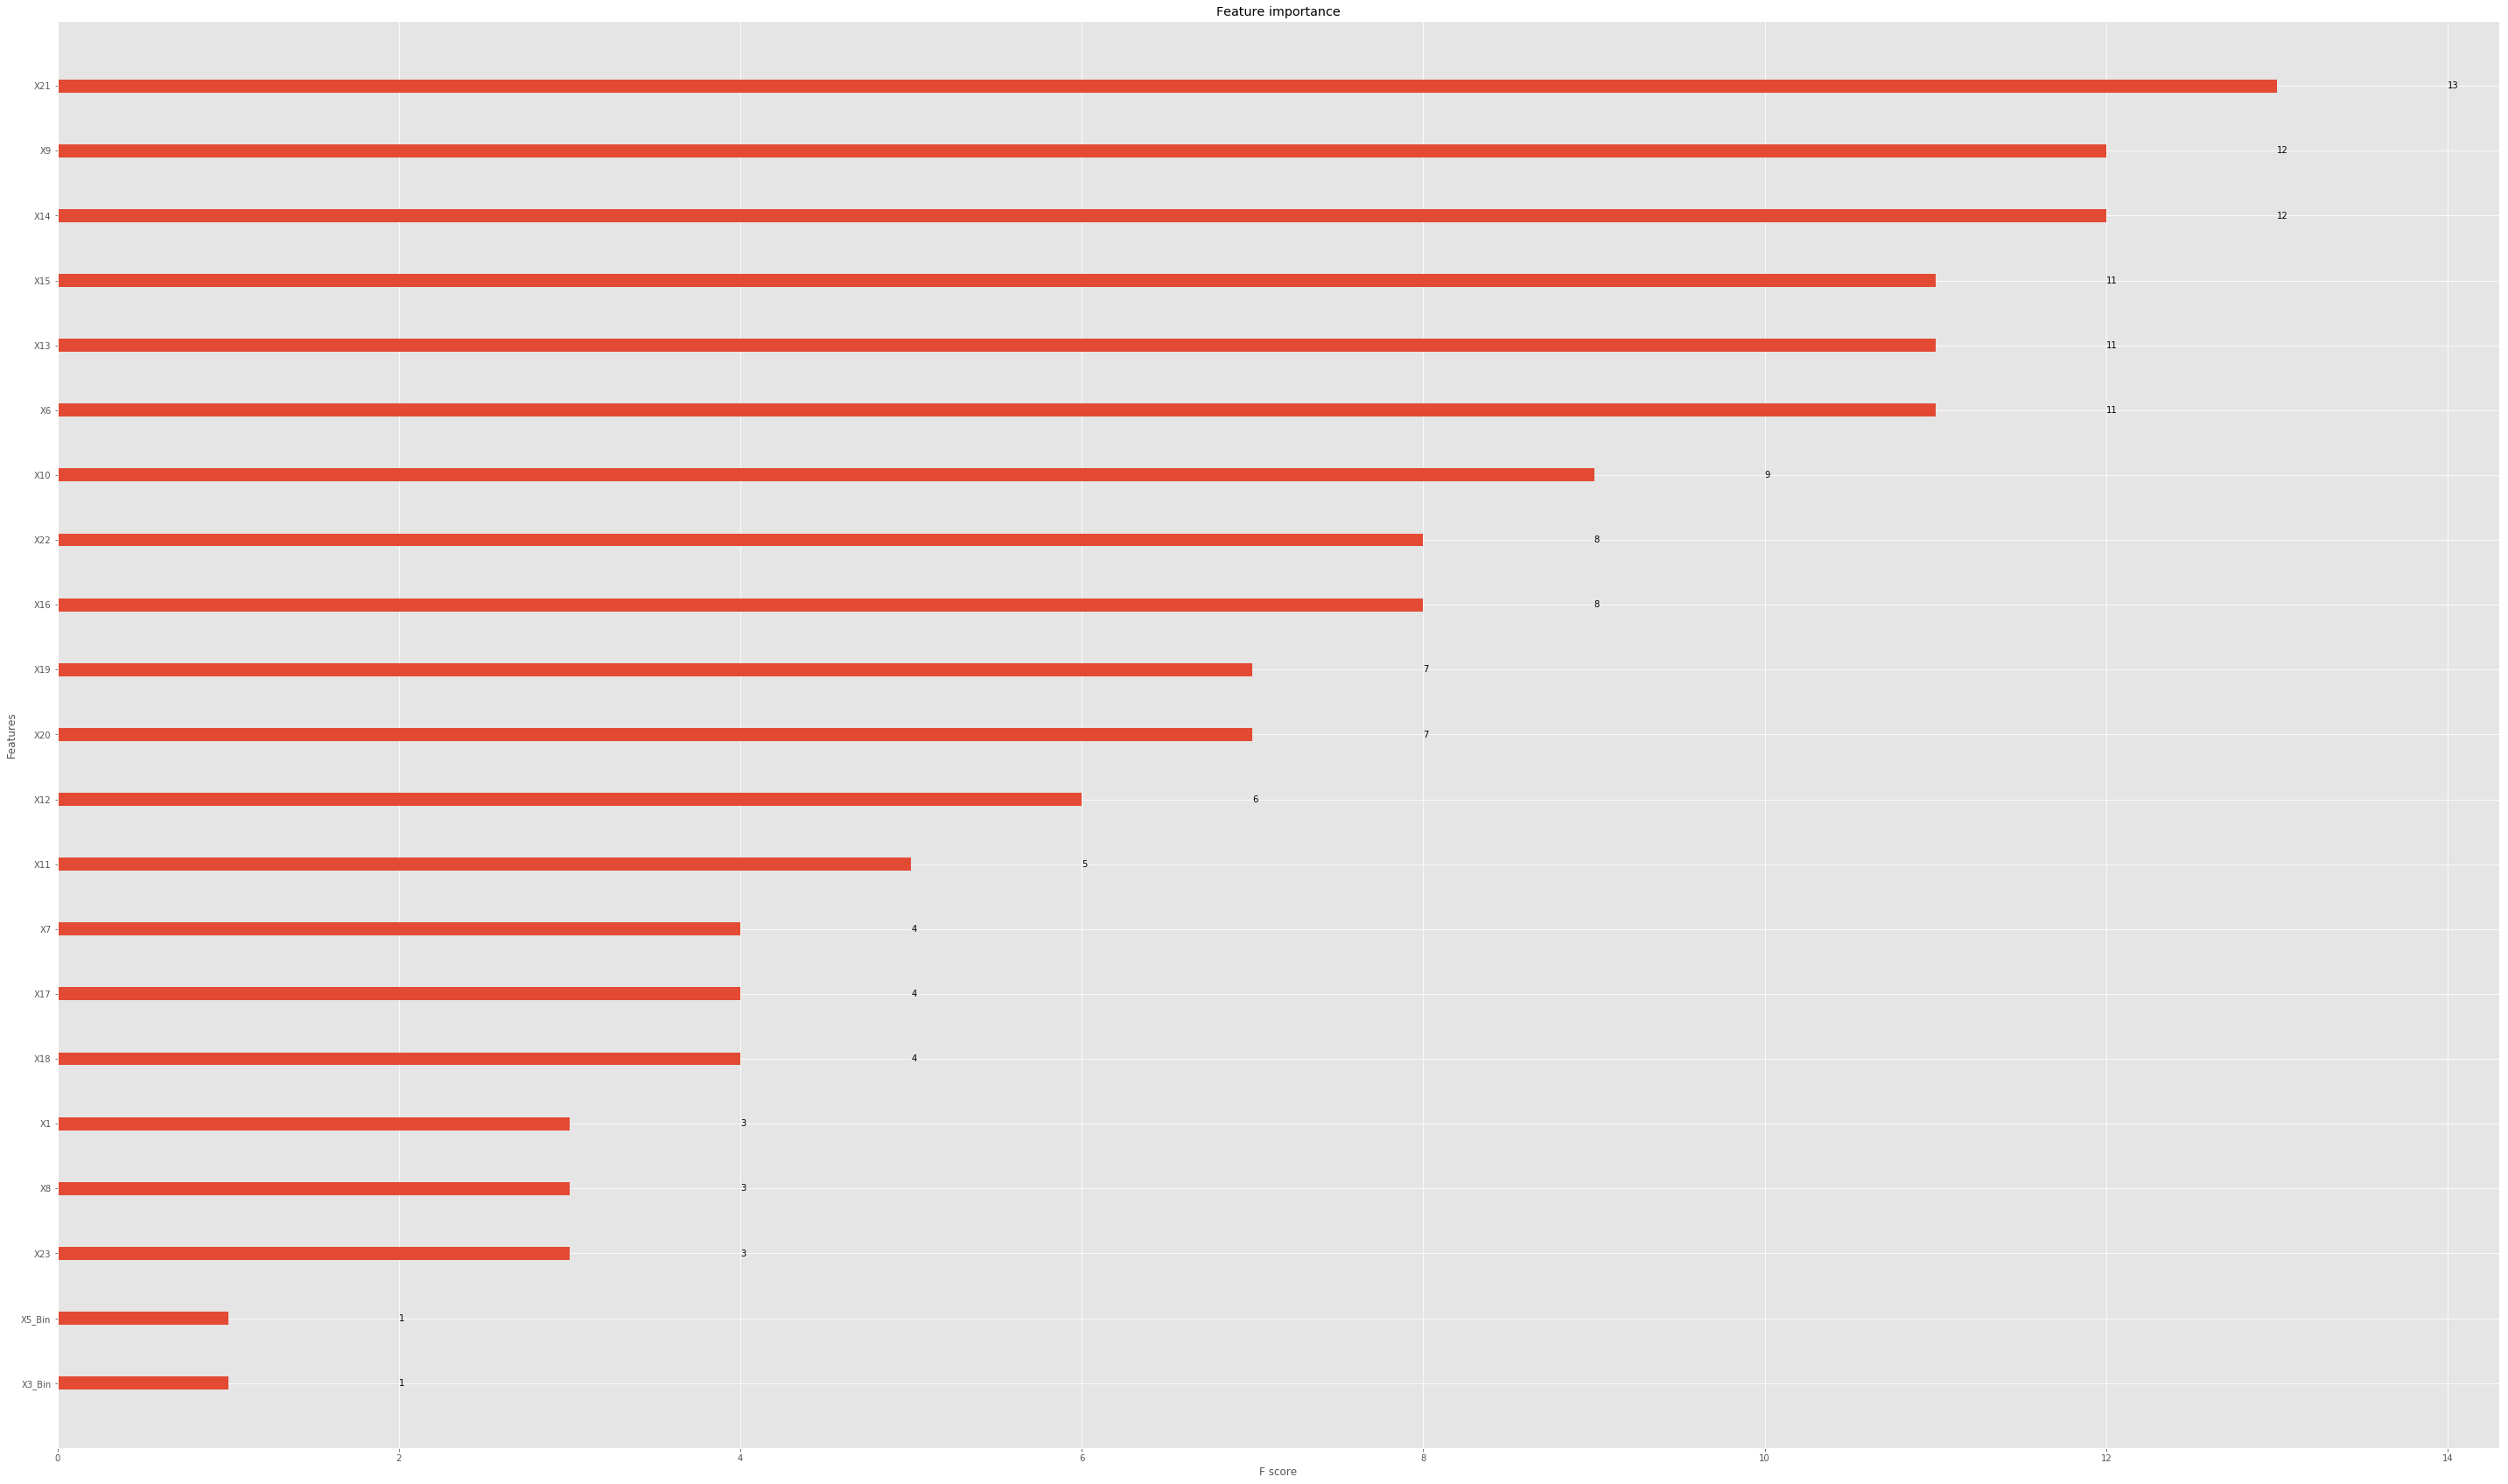

In [13]:
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()